

# Project: Investigate a Dataset (Investigating no show appointments in Brazil)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I this project I'll be investigating a dataset containing data from patients and whether or not they are a no show. The data contains some information about the patient, and whether or not the patient was a no show. Information about the patient includes basic health information (hypertension, diabetes, acoholism), which neightborhood the patient lives in, and whether or not the patient is enrolled in a Brazilian welfare program, 'Bolsa Familia'). The dataset also includes information about which date the appointment was set for. 
Some of the questions that I may ask are:

1) Are patients who are high risk in terms of health conditions (hypertension, alcoholism,
and Diabetes) more likely to show up or miss an appointment? 

2) Does the data indicate that a particular day of the week or time of the appointment is associated with more missed appointments?

3) Are the no shows due to fewer patients missing more appointments or more patients each missing a few appointments? 



In [19]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
import numpy as np
df_appointments = pd.read_csv('noshowappointments.csv')
df_appointments.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [20]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_appointments.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Items to complete for Data Cleaning: 
After looking at the first few rows of data and the information about the data, I am performing the following functions to clean up the data: 

1) Remove all null values

2) Remove duplicate rows (only duplicate rows where the values in all the columns are equal-if the same patient id has missed multiple appointments, that's something that should be captured 

3) Change all the column names to lowercase no spaces for consistency and simplicity

4) Change the column 'Scheduled Day' to date time format

___________________________________________________

Columns to add to allow for making comparisons: 

1) Add day of the week of the scheduled appointment.

2) Add morning or afternoon based on when the patient's appointment was scheduled for.

3) Add a column that sums up the different health conditions and adds a patient 'health score'.

4) Add a column that adds the labels 'high_risk', 'medium_risk', 'low_risk' based on patient
health score.





### Data Cleaning (See below)


Cleaning Step 1: Removing all null values: 
Looking at the information about the data set shows there are no null values. There are 110527 rows, and no null 
values for each of the columns



In [21]:
#Cleaning step 2: Removing duplicate rows: (the result below shows there are no duplicate rows)
df_duplicatetest = df_appointments.duplicated()
df_duplicatetest.unique()

array([False], dtype=bool)

In [22]:
#Cleaning step 3: Change scheduled day to date_time format
df_appointments['ScheduledDay'] = pd.to_datetime(df_appointments['ScheduledDay'])
df_appointments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](1), float64(1), int64(8), object(4)
memory usage: 11.8+ MB


In [23]:
#Cleaning step 4: Changing the names of the columns to be all lowercase with no spaces
new_labels = ['patient_id',
              'appointment_id',
              'gender',
              'scheduled_day',
              'appointment_day',
              'age',
              'neighborhood',
              'scholarship',
              'hypertension',
              'diabetes',
              'alcoholism',
              'handicap',
              'sms_received',
              'no_show']

df_appointments.columns = new_labels
df_appointments.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [24]:
#Change the patient ID to an integer so that the entire patient ID number can be compared.
#Currently the column is in scientific notation. 
df_appointments['patient_id'] = df_appointments['patient_id'].astype(int)
df_appointments.head()
df_appointments.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null int64
appointment_id     110527 non-null int64
gender             110527 non-null object
scheduled_day      110527 non-null datetime64[ns]
appointment_day    110527 non-null object
age                110527 non-null int64
neighborhood       110527 non-null object
scholarship        110527 non-null int64
hypertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handicap           110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null object
dtypes: datetime64[ns](1), int64(9), object(4)
memory usage: 11.8+ MB


In [25]:
#Adding Column 1: Day of the week (day_of_the_week), also determine which days are 
#appointments made on


df_appointments['day_of_the_week'] = (df_appointments['scheduled_day'].dt.weekday_name)
df_appointments['day_of_the_week'].unique()





array(['Friday', 'Wednesday', 'Tuesday', 'Thursday', 'Monday', 'Saturday'], dtype=object)

In [26]:
#Adding column 2: Was the appointment in the morning or afternoon(half_of_day)
df_appointments['hour'] = (df_appointments['scheduled_day'].dt.hour)
df_appointments['hour'].describe()
df_appointments['hour'].unique()
#looked at range of appointment times to determine how many bins to create


array([18, 16, 17,  8, 15, 12, 14, 11, 10,  9,  7, 13, 19, 20,  6, 21])

In [27]:
#Adding column 2 continued: Dividing up the hours into bins to make the columns: 
bin_edges = [0,9,12,15,18,21]
bin_names = ['Early Morn', 'Late Morn', 'Early Afternoon', 'Late Afternoon', 'Evening']
df_appointments['time_description'] = pd.cut(df_appointments['hour'], bin_edges, labels = bin_names)
df_appointments.head()
df_appointments['time_description'].unique()


[Late Afternoon, Early Morn, Early Afternoon, Late Morn, Evening]
Categories (5, object): [Early Morn < Late Morn < Early Afternoon < Late Afternoon < Evening]

In [28]:
#Create a column with the patient's risk level. The risk levels are defined as follows: 
# Adding up the values in the following columns: hypertension, diabetes, alcoholism
#sum is 3(all three conditions are present): Highest risk
#sum is 2(two conditions are present): High risk
#sum is 1(one condition is present): Medium risk
#sum is 0(no conditions are present): Low risk

df_appointments['numerical_health_risk'] = df_appointments.loc[:, 'hypertension': 'alcoholism'].sum(axis = 1)
df_appointments['numerical_health_risk'].unique()

risk_to_description = {0: 'Low risk', 1: 'Medium risk', 2: 'High risk', 3: 'Very high risk'}
df_appointments['health_risk'] = df_appointments.numerical_health_risk.map(risk_to_description)
df_appointments.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,day_of_the_week,hour,time_description,numerical_health_risk,health_risk
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,18,Late Afternoon,1,Medium risk
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,16,Late Afternoon,0,Low risk
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,16,Late Afternoon,0,Low risk
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,17,Late Afternoon,0,Low risk
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,16,Late Afternoon,2,High risk


In [29]:
#Create a column to determine if there are repeat offenders (patients who have missed more 
#than one appointment: 
#(group by patient id)
# function to determine if patients have more than one appointment (patient id is listed more 
#than once )

#counting how many values:
patient_id_unique = df_appointments['patient_id'].unique()
np.count_nonzero(patient_id_unique)

#There are a total of 110527 rows and the number of unique rows of patient id is 
#62299. Next step is to:

#Create a column that summarizes how many times the patient id for that row shows up 
#in the dataframe
df_appointments['total_appointments'] = df_appointments.groupby('patient_id')['patient_id'].transform('count')
df_appointments.head()
df_appointments['total_appointments'].unique()

#later realized this column was not required, but I kept it in since I refer to loc later on



array([ 2,  1,  6,  3,  5,  7,  4,  8, 14,  9, 13, 12, 11, 10, 20, 15, 16,
       29, 54, 17, 19, 35, 21, 18, 23, 55, 40, 30, 88, 70, 46, 62, 34, 57,
       51, 65, 84, 38, 37, 22, 42, 33, 50, 24])

In [30]:
#Code to determine how many no show appointments each patient has. 

df_appointments['number_of_no_shows'] = df_appointments.groupby(['patient_id'])['no_show'].transform(lambda x: x[x.str.contains('es')].count())


df_appointments['number_of_no_shows'].unique()
df_appointments.head()

#source: https://stackoverflow.com/questions/31649669/
#pandas-groupby-count-string-occurrence-over-column

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,...,handicap,sms_received,no_show,day_of_the_week,hour,time_description,numerical_health_risk,health_risk,total_appointments,number_of_no_shows
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,...,0,0,No,Friday,18,Late Afternoon,1,Medium risk,2,0
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,...,0,0,No,Friday,16,Late Afternoon,0,Low risk,2,0
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,...,0,0,No,Friday,16,Late Afternoon,0,Low risk,2,0
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,...,0,0,No,Friday,17,Late Afternoon,0,Low risk,2,1
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,...,0,0,No,Friday,16,Late Afternoon,2,High risk,1,0


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (Do at risk patients miss more appointments than healthy patients?)

health_risk
High risk          4450
Low risk          55348
Medium risk       10001
Very high risk      142
Name: number_of_no_shows, dtype: int64
health_risk
High risk          30533
Low risk          289338
Medium risk        70490
Very high risk       974
Name: total_appointments, dtype: int64
health_risk
High risk         0.145744
Low risk          0.191292
Medium risk       0.141878
Very high risk    0.145791
dtype: float64


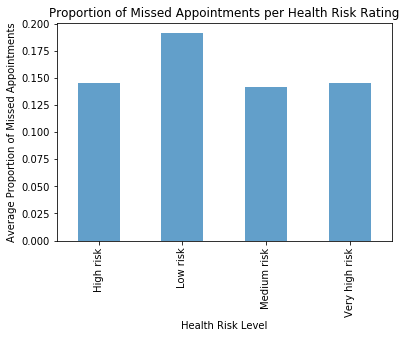

In [31]:


#First I need to create buckets of information for people who are in the health categories that were
#created to capture how at risk a patient is. I created two separate dataframes (no-shows and shows) and
#then grouped by health risk category (see cell #10 above for definitions of health risks). 

grouped_no_shows = df_appointments.groupby('health_risk')['number_of_no_shows'].sum()
grouped_total_appointments = df_appointments.groupby('health_risk')['total_appointments'].sum()


print(grouped_no_shows)
print(grouped_total_appointments)
# This isn't really representative, it makes more sense to print the proportion of missed
#appointments since patients in each health category could have a different number of 
#appointments to begin with 

proportions = grouped_no_shows/grouped_total_appointments
proportions.plot(kind = 'bar', title = 'Proportion of Missed Appointments per Health Risk Rating', alpha = 0.7)
plt.xlabel('Health Risk Level')
plt.ylabel('Average Proportion of Missed Appointments')
print (proportions)


### Research Question 2  (Does the time of day or the day of the week have anything to do with missed appointment occurrences?)

time_description
Early Morn         8544
Late Morn          5472
Early Afternoon    5834
Late Afternoon     2324
Evening             145
dtype: int64
time_description
Early Morn         48963
Late Morn          24940
Early Afternoon    26242
Late Afternoon      9791
Evening              591
dtype: int64


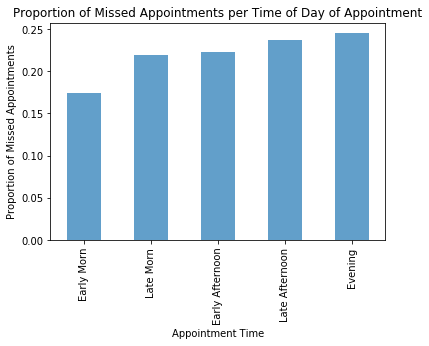

time_description
Early Morn         0.174499
Late Morn          0.219407
Early Afternoon    0.222315
Late Afternoon     0.237361
Evening            0.245347
dtype: float64


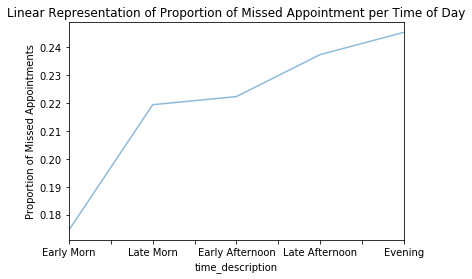

In [32]:
# Creating two seperate dataframes, one with shows, the other with no-shows to determine
#

df_no_show = df_appointments.query('no_show == "Yes"')


#Calculating the mean % of missed appointments for the time of day
number_of_missed = df_no_show.groupby(['time_description']).size()
total_appt_bytime = df_appointments.groupby(['time_description']).size()

print(number_of_missed)
print(total_appt_bytime)

proportions = number_of_missed/total_appt_bytime
proportions.plot(kind = 'bar', title = 'Proportion of Missed Appointments per Time of Day of Appointment', alpha = 0.7)
plt.xlabel('Appointment Time')
plt.ylabel('Proportion of Missed Appointments')
plt.show()
proportions.plot(kind = 'line', title = 'Linear Representation of Proportion of Missed Appointment per Time of Day',
                 alpha = 0.5)
plt.ylabel ('Proportion of Missed Appointments')
print (proportions)




day_of_the_week
Friday       3887
Monday       4561
Saturday        1
Thursday     3700
Tuesday      5291
Wednesday    4879
dtype: int64
day_of_the_week
Friday       18915
Monday       23085
Saturday        24
Thursday     18073
Tuesday      26168
Wednesday    24262
dtype: int64


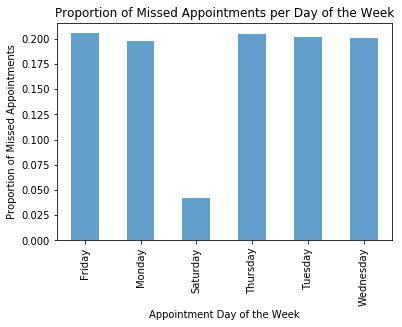

day_of_the_week
Friday       0.205498
Monday       0.197574
Saturday     0.041667
Thursday     0.204725
Tuesday      0.202194
Wednesday    0.201096
dtype: float64


In [33]:
#Part 2 of Question 2: Does the day of the week have anything to do with the proportion of missed
#appointments? 

#Calculating the mean proportion of missed appointments for the time of day
number_of_missed = df_no_show.groupby(['day_of_the_week']).size()
total_appt_bytime = df_appointments.groupby(['day_of_the_week']).size()

print(number_of_missed)
print(total_appt_bytime)

proportions = number_of_missed/total_appt_bytime
proportions.plot(kind = 'bar', title = 'Proportion of Missed Appointments per Day of the Week', alpha = 0.7)
plt.xlabel('Appointment Day of the Week')
plt.ylabel('Proportion of Missed Appointments')
plt.show()

print (proportions)





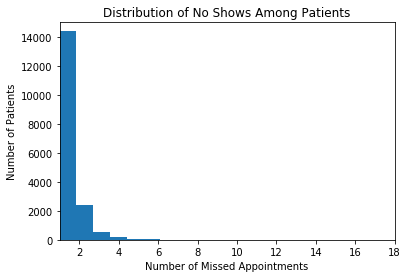

22319
1.0


count    17663.000000
mean         1.263602
std          0.730876
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         18.000000
Name: number_of_no_shows, dtype: float64

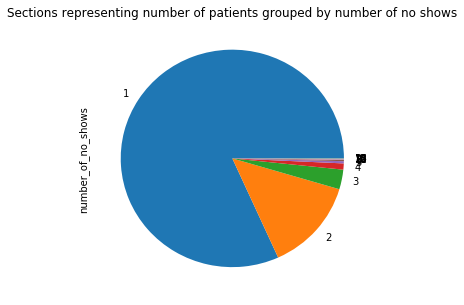

In [35]:
#Is the number of no show appointments evenly distributed throughout the patient population, 
# or are there certain patients that have more missed appointments than others? 

#Since the patient id's are in such a large range, it makes it difficult to see this on the 
#x axis. I will apply a numerical index to each patient id (since in this new dataframe
# each patient id is listed only once)
df_patientnoshow = df_no_show.iloc[:,[0,1,20]]
df_patientnoshow2 = df_patientnoshow.drop_duplicates(subset = 'patient_id')


plt.hist(df_patientnoshow2['number_of_no_shows'], bins = 20)
plt.title('Distribution of No Shows Among Patients')
plt.xlabel('Number of Missed Appointments')
plt.ylabel('Number of Patients')
         
plt.axis([1,18, 0,15000])
plt.show()

df_patientnoshow2['number_of_no_shows'].value_counts().plot(kind = 'pie',
figsize= (5,5) ,title = 'Sections representing number of patients grouped by number of no shows');


total_missed_appointments = df_patientnoshow.shape[0]
print(total_missed_appointments)

print(df_patientnoshow2['number_of_no_shows'].median())
df_patientnoshow2['number_of_no_shows'].describe()

# <a id='conclusions'></a>
## Conclusions

1) A bar graph and some calculations were used to answer the first question, whether higher
risk patients missed more appointments than low risk patients. The way 'high risk' was defined 
with this limited data set is be creating a risk score which added 1 for each of the three
conditions: Diabetes, Hypertension, and Alcoholism. Based on the visual presented by the graph, it appears as though the greatest proportion of missed appointments was in patients with a calculated health risk of 0 (no alcoholism, hypertension, or diabetes). The proportions for missed appointments were as follows for all the calculated health categories: 

Category:         Proportion of Missed Appointments/Total Appointments

High risk         0.145744

Low risk          0.191292

Medium risk       0.141878

Very high risk    0.145791



2a) A bar graph, a linear plot and some calculations were used to answer the second question, whether a greater incidence of missed appointments was observed during a particular time of day or day of the week. 
A bar graph was initially used to show the proportion of missed appointments for all the different times of the day: Early Morning (up until 9 am), Late Morning (9 am -12 pm), Early Afternoon (12 pm -3 pm), Late afternoon (3 pm -6 pm) and evening (6 pm - 9 pm). From the bar graph the proportion of missed appointments got higher as the time of day increased. This was shown even more clearly in the line graph that was also plotted.  The proportions for missed appointments were as follows for different parts of the day: 

Category:         Proportion of Missed Appointments/Total Appointments

Early Morn         0.174499

Late Morn          0.219407

Early Afternoon    0.222315

Late Afternoon     0.237361

Evening            0.245347

2b)A similar approach was taken to evaluate which day of the week had the lowest proportion of missed appointments. The bar graph showed quite clearly that Saturday had the lowest proportion of missed appointments (there were no appointments on Sunday). There were also fewer appointments on Saturday. While the total number of appointments is factored in (the proportion of missed appointments/total appointments is being used for comparison, not the total number of missed appointments), the data set for Saturday is much smaller than the rest of the days (see above), so it may not be valid to compare Saturday to the other days of the week. 

3) The last question was looking at whether most patients only missed 1 appointment, or if the number of no show appointments was due to a smaller number of patients that were missing more appointments. The first figure created, although not very useful, does show that most patients missed fewer appointments. The describe feature gave more valuable information about the number of no shows that patients had: 
There were 22319 total missed appointments, and 17,633 patients who missed appointments. 75% of the no show patients missed 1 appointment or less, with the mean number of missed appointments at 1.3. 

Statistics for number of missed appointments/patient: 

count    17663.000000

mean         1.263602

std          0.730876

min          1.000000

25%          1.000000

50%          1.000000

75%          1.000000

max         18.000000


This analysis represented a subset of variables. There are other variables that are not included here, such as how far are the patients from the health center? What are the primary 
means of transportation to and from the center? These variables, among others, can have a significant impact on the number of no show appointments.  
